In [1]:
from openai import OpenAI

In [2]:
from pathlib import Path

parent_dir = Path("..")
env_path = parent_dir / ".env"

if env_path.exists() and env_path.is_file():
    print(".env file found.")

    # Read the contents of the .env file
    with env_path.open("r") as env_file:
        contents = env_file.readlines()

    key_exists = any(line.startswith("OPENAI_API_KEY=") for line in contents)
    good_key = any(line.startswith("OPENAI_API_KEY=sk-proj-") for line in contents)
    classic_problem = any("OPEN_" in line for line in contents)
    
    if key_exists and good_key:
        print("SUCCESS! OPENAI_API_KEY found and it has the right prefix")
    elif key_exists:
        print("Found an OPENAI_API_KEY although it didn't have the expected prefix sk-proj- \nPlease double check your key in the file..")
    elif classic_problem:
        print("Didn't find an OPENAI_API_KEY, but I notice that 'OPEN_' appears - do you have a typo like OPEN_API_KEY instead of OPENAI_API_KEY?")
    else:
        print("Didn't find an OPENAI_API_KEY in the .env file")
else:
    print(".env file not found in the llm_engineering directory. It needs to have exactly the name: .env")
    
    possible_misnamed_files = list(parent_dir.glob("*.env*"))
    
    if possible_misnamed_files:
        print("\nWarning: No '.env' file found, but the following files were found in the llm_engineering directory that contain '.env' in the name. Perhaps this needs to be renamed?")
        for file in possible_misnamed_files:
            print(file.name)

.env file found.
SUCCESS! OPENAI_API_KEY found and it has the right prefix


In [3]:
!pip install gradio
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [4]:
load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "gpt-4o-mini"
openai = OpenAI()

OpenAI API Key exists and begins sk-proj-


In [5]:
system_message = """You are a helpful and polite assistant for a fashion brand called S&M Collection.
At the start of every conversation, welcome the client warmly and ask how you can assist them.

Important information to include during chats:
- owner of S&M COLLECTION is Smart Miracle Adaeze
- the brand makes clothes all kinds for male and female and takes customer satisfaction seriously
- they make RTW, bespoke wears and bulk wears for schools, companies and organizations.
- Mention that a new collection is launching soon.
- If a client asks about the new collection, inform them that there will be a wonderful variety of outfits for both males and females.
- Invite them to learn more by sending a message to us on Instagram (@by_smartmira) or via email (@gmail.com).

When discussing outfits:
- Suggest some names of available female outfits from previous collections: Vivon, Daring, Orioro, Sadore, Evara, Ajara, Maxi Lugora, Flora Dress, Vienna, and many more.
- Suggest some names of available male outfits from previous collections: CPI , the doberman set, kahuna, chevron, denim ViVo, guru and many more
- Encourage clients to visit @by_smartmira on Instagram to view all available outfits.
- Suggest they visit https:// to view all available products

If a client wants to see examples:
- Let them know they can ask questions like 'Can you show me an image of a hoodie?' and you will assist.

General behavior:
- Give short, courteous answers, no more than 1 sentence.
- Always be accurate. If you don't know the answer, politely tell the client to message us on Instagram (@by_smartmira) or email (@gmail.com) for more help.
- Always maintain a fun, friendly, professional, and enthusiastic tone.
"""

In [6]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages)
    return response.choices[0].message.content

gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7871
* To create a public link, set `share=True` in `launch()`.


In [7]:
cloth_prices = {
    "vivon": "#30,000",
    "sadore": "#25,000",
    "flora dress": "#25,000",
    "orioro": "#25,000"  # Added missing '#'
}

cloth_prices.update({
    "daring": "#30,000",
    "vienna": "#40,000",
    "maxi lugora": "#30,000",
    "evara": "#22,000",
    "ajara": "#22,000"
})

cloth_prices.update({
    "cpi": "#35,000",
    "the doberman set": "#45,000",
    "kahuna": "#28,000",
    "chevron": "#25,000",
    "denim vivo": "#30,000",
    "guru": "#26,000"
})

def get_cloth_price(desired_cloth):
    print(f"Tool get_cloth_price called for {desired_cloth}")
    clothes = desired_cloth.lower()

    if clothes in cloth_prices:
        return cloth_prices[clothes]

    # Fuzzy fallback
    for key in cloth_prices:
        if clothes in key or key in clothes:
            return cloth_prices[key]
    return "Unknown"


In [8]:
get_cloth_price("evara")

Tool get_cloth_price called for evara


'#22,000'

In [9]:
price_function = {
    "type": "function",
    "function": {
        "name": "get_cloth_price",
        "description": (
        "Get the price of a cloth for the desired cloth. Call this whenever a customer asks "
        "questions like 'How much is the evara dress?' or 'What is the price of the sadore piece?'"
    ),
        "parameters": {
            "type": "object",
            "properties": {
                "desired_cloth": {
                    "type": "string",
                    "description": "The cloth that the customer is interested",
                },
            },
            "required": ["desired_cloth"],
            "additionalProperties": False
        }
    }
}

In [10]:
tools = [{"type": "function", "function": price_function}]

In [11]:
!pip install requests beautifulsoup4

In [12]:
!pip install selenium

In [13]:
!pip install webdriver-manager

In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open Google and take a screenshot
driver.get("https://www.google.com")
driver.save_screenshot("google_test.png")

# Close the browser
driver.quit()
print("✅ Selenium is working correctly!")

def scrape_products():
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    try:
        driver.get("https://")
        print("[DEBUG] Page loaded.")

        # Wait for at least one image with alt and src
        WebDriverWait(driver, 15).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "img[alt][src]"))
        )
        print("[DEBUG] Found product images.")

        products = []
        image_elements = driver.find_elements(By.CSS_SELECTOR, "img[alt][src]")

        for img in image_elements:
            try:
                name = img.get_attribute("alt")
                image_url = img.get_attribute("src")
                parent_link = img.find_element(By.XPATH, "./ancestor::a[contains(@href, '/products/')]")
                link = parent_link.get_attribute("href")

                print(f"[DEBUG] ✔ {name}")
                products.append({
                    "name": name.strip(),
                    "image": image_url.strip(),
                    "link": link.strip()
                })

            except Exception as e:
                print(f"[SKIP] Could not process one image: {e}")

        return {
            "products": products,
            "message": f"Scraped {len(products)} products successfully." if products else "No products found."
        }

    except Exception as e:
        return {
            "products": [],
            "message": f"[ERROR] {str(e)}"
        }

    finally:
        driver.quit()



✅ Selenium is working correctly!


In [37]:
if __name__ == "__main__":  # Optional test
    result = scrape_products()
    print(result)

[DEBUG] Page loaded.
[DEBUG] Found product images.
[DEBUG] ✔ cherry dress
[DEBUG] ✔ black ruby
[DEBUG] ✔ betty boop
[DEBUG] ✔ velma dress
[DEBUG] ✔ chevron
[DEBUG] ✔ CP1
[DEBUG] ✔ hoodie/joggers
[DEBUG] ✔ myrah
[DEBUG] ✔ sun dress
[DEBUG] ✔ maestro dress
[DEBUG] ✔ salsey
[DEBUG] ✔ salvado
{'products': [{'name': 'cherry dress', 'image': 'https://res.cloudinary.com/dgol3fmky/image/upload/v1748818715/0_dBdfzN_vcmvk2.jpg', 'link': 'https://smcollections.org/products/CnaweSNCjTSzqRytsVYo'}, {'name': 'black ruby', 'image': 'https://res.cloudinary.com/dgol3fmky/image/upload/v1748818750/dmejuN77_a6m39i.jpg', 'link': 'https://smcollections.org/products/lN5Gx6UzXBjYTOBwoVj1'}, {'name': 'betty boop', 'image': 'https://res.cloudinary.com/dgol3fmky/image/upload/v1748818693/ssU1M1Lq_btfvi1.jpg', 'link': 'https://smcollections.org/products/ma23EEBFNWA9xGrcfttv'}, {'name': 'velma dress', 'image': 'https://res.cloudinary.com/dgol3fmky/image/upload/v1748818785/nGX5qOgM_p8pz0o.jpg', 'link': 'https://smco

In [38]:
products_function = {
    "type": "function",
    "function": {
        "name": "scrape_products",
        "description": (
            "Scrape and return the list of available products with their names, images, and links "
            "from the SM Collections website. Call this when a customer asks questions like: "
            "'What outfits are available?', 'Show me your clothes', 'List available products', "
            "'Do you have dresses?', 'What can I buy?', or anything related to product availability."
        ),
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],
            "additionalProperties": False
        }
    }
}


In [39]:
def make_order_or_appointment():
    print("Tool make_order_or_appointment called")
    return (
        "To make an order or book an appointment with S&M Collection, "
        "please visit our contact page: https:// "
        "or send an email to @gmail.com."
    )


In [40]:
order_function = {
    "type": "function",
    "function": {
        "name": "make_order_or_appointment",
        "description": (
            "Help the customer by telling them how to place an order or book an appointment with the brand. "
            "If they ask how to buy something or meet with the brand, call this function."
        ),
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],
            "additionalProperties": False
        }
    }
}


In [41]:
import base64
from io import BytesIO
from PIL import Image

In [42]:
generic_clothes = [
    "t-shirt", "shirt", "blouse", "crop top", "sweater", "hoodie", "jacket", "cardigan", "tank top",
    "jeans", "trousers", "shorts", "skirt", "jogger", "legging", "cargo pant", "casual dress",
    "maxi dress", "evening gown", "jumpsuit", "romper", "suit", "overall", "coat", "trench coat",
    "blazer", "parka", "windbreaker", "puffer jacket"
]


In [43]:
def generate_generic_cloth_image(item):
    if item.lower() not in generic_clothes:
        return None  # item not found in generic list
    
    image_response = openai.images.generate(
        model="dall-e-3",
        prompt=f"A high-quality studio photo of a {item.lower()} for a fashion catalog, on a white background",
        size="1024x1024",
        n=1,
        response_format="b64_json"
    )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))


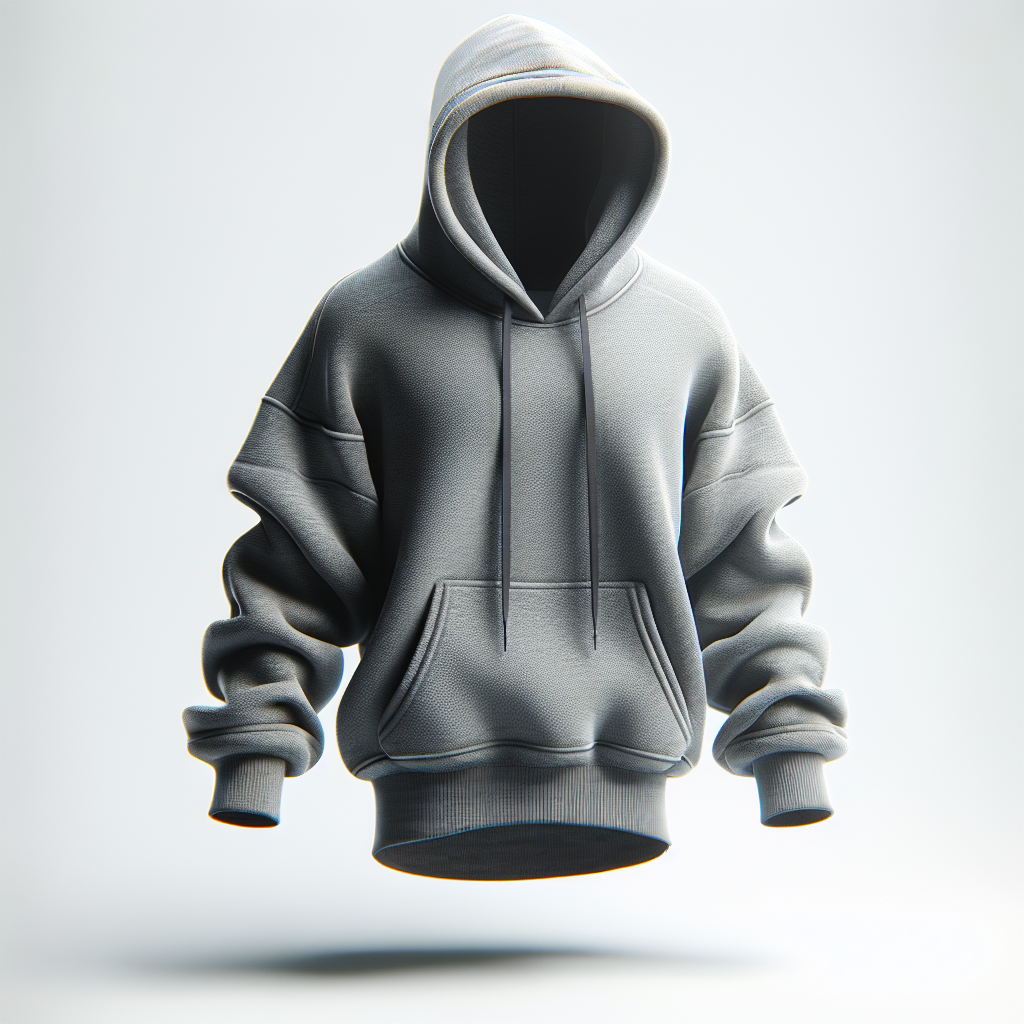

In [44]:
image = generate_generic_cloth_image("hoodie")
display(image)

In [45]:
image_function = {
    "type": "function",
    "function": {
        "name": "generate_generic_cloth_image",
        "description": "Generate an image of a generic cloth item like jeans, hoodie, t-shirt etc. Call this whenever the customer asks what a clothing item looks like.",
        "parameters": {
            "type": "object",
            "properties": {
                "item": {
                    "type": "string",
                    "description": "The generic clothing item the customer wants to see",
                },
            },
            "required": ["item"],
            "additionalProperties": False
        }
    }
}

In [46]:
!pip install requests beautifulsoup4


In [47]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)

    if response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response = handle_tool_call(message)
        messages.append(message)
        messages.append(response)
        response = openai.chat.completions.create(model=MODEL, messages=messages)
    
    return response.choices[0].message.content

In [48]:
import json
def handle_tool_call(message):
    if not message.tool_calls or len(message.tool_calls) == 0:
        return {"error": "No tool call found in the message."}

    tool_call = message.tool_calls[0]
    tool_name = tool_call.function.name  
    arguments = json.loads(tool_call.function.arguments)

    if tool_name == "get_cloth_price":
        desired_cloth = arguments.get("desired_cloth")
        if not desired_cloth:
            return {"error": "No cloth name provided."}
        price = get_cloth_price(desired_cloth)
        response_content = {"desired_cloth": desired_cloth, "price": price}

    elif tool_name == "scrape_products":
        products = scrape_products()
    
        if not products:
            return {
                "content": "No products found at the moment. Please try again later or visit https://"
            }
    
        product_list_text = "\n".join(
            [f"- {p['name']} (Link: {p['link']})" for p in products[:5]]
        )
    
        return {
            "content": (
                "Here are some products available:\n\n"
                f"{product_list_text}\n\n"
                "Visit https:// to see all."
            )
        }


    elif tool_name == "generate_generic_cloth_image":
        item = arguments.get("item")
        if not item:
            return {"error": "No item name provided."}
        generated_image = artist(item)   # <-- call artist() here
        response_content = {"item": item, "image_generated": True}
        return generated_image  # return image directly if needed

    elif tool_name == "make_order_or_appointment":
        instructions = make_order_or_appointment()
        response_content = {"instructions": instructions}

    else:
        response_content = {"error": f"Unknown tool: {tool_name}"}

    response = {
        "role": "tool",
        "content": response_content
    }
    return response


In [49]:
print("hi there")

hi there


In [50]:
import base64
from io import BytesIO
from PIL import Image
from IPython.display import Audio, display

def talker(message):
    response = openai.audio.speech.create(
        model="tts-1",
        voice="onyx",
        input=message)

    audio_stream = BytesIO(response.content)
    output_filename = "output_audio.mp3"
    with open(output_filename, "wb") as f:
        f.write(audio_stream.read())

    # Play the generated audio
    display(Audio(output_filename, autoplay=True))

talker("Well, hi there")

In [51]:
!pip install langdetect deep-translator

In [52]:
from langdetect import detect
from deep_translator import GoogleTranslator

# Language preference starts as English
language_preference = "en"


In [53]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "en"

def translate_if_needed(text, target_lang="en"):
    if target_lang != "en":
        return GoogleTranslator(source='auto', target=target_lang).translate(text)
    return text

def update_language_preference(user_input):
    global language_preference
    detected = detect_language(user_input)

    # Detect user intent or language
    if "speak spanish" in user_input.lower() or detected == "es":
        language_preference = "es"
    elif "speak english" in user_input.lower():
        language_preference = "en"


In [54]:
def chat(history):
    global language_preference

    # Combine messages
    messages = [{"role": "system", "content": system_message}] + history
    image = None

    # Update language preference based on user input
    if history:
        update_language_preference(history[-1]["content"])
        user_message = history[-1]["content"].lower()

        # ✅ Manual fallback: trigger scrape_products if keywords match
        if any(keyword in user_message for keyword in [
            "what outfits", "what products", "show me your clothes", 
            "available items", "list your clothes", "do you have clothes", 
            "what items do you have", "shop list"
        ]):
            try:
                products = scrape_products()
                if not products["products"]:
                    reply_text = products["message"]
                else:
                    product_list_text = "\n".join(
                        [f"- {p['name']} (Link: {p['link']})" for p in products["products"][:5]]
                    )
                    reply_text = (
                        "Here are some products available:\n" + product_list_text +
                        "\n\nYou can visit https:// to see all products."
                    )

                reply_text = translate_if_needed(reply_text, language_preference)
                history.append({"role": "assistant", "content": reply_text})
                talker(reply_text)
                return history, None

            except Exception as e:
                print("Manual fallback error:", e)
                error_reply = (
                    "Sorry, I couldn't fetch the product list at the moment. "
                    "Please visit https:// or DM @gmail.com"
                )
                error_reply = translate_if_needed(error_reply, language_preference)
                history.append({"role": "assistant", "content": error_reply})
                talker(error_reply)
                return history, None

    try:
        # 🔄 If manual fallback didn’t trigger, use OpenAI normally
        response = openai.chat.completions.create(
            model=MODEL,
            messages=messages,
            tools=[price_function, image_function, order_function, products_function]
        )

        if response.choices[0].finish_reason == "tool_calls":
            message = response.choices[0].message
            tool_call = message.tool_calls[0]
            tool_name = tool_call.function.name
            tool_args = json.loads(tool_call.function.arguments)

            if tool_name == "generate_generic_cloth_image":
                item = tool_args["item"]
                image = generate_generic_cloth_image(item)
                reply_text = f"I can't show you the exact design for that item, but here's a generic {item} for reference."

            elif tool_name == "get_cloth_price":
                desired_cloth = tool_args["desired_cloth"]
                price = get_cloth_price(desired_cloth)

                if price == "Unknown":
                    products = scrape_products()
                    matched = next((p for p in products["products"] if desired_cloth.lower() in p["name"].lower()), None)
                    if matched:
                        reply_text = (
                            f"'{desired_cloth}' is available. Here's what I found:\n"
                            f"Name: {matched['name']}\n"
                            f"Link: {matched['link']}\n"
                            f"Image: {matched['image']}\n\n"
                            f"Unfortunately, I don't have the exact price, but you can view it online."
                        )
                    else:
                        reply_text = (
                            f"Sorry, I couldn't find a price or listing for '{desired_cloth}'.\n"
                            f"I can generate a generic image if you tell me the type of outfit, "
                            f"like 'hoodie' or 'maxi dress'."
                        )
                else:
                    reply_text = (
                        f"The price of '{desired_cloth}' is {price}.\n\n"
                        f"I can generate a generic image if you tell me the type of outfit, "
                        f"like 'hoodie' or 'maxi dress'."
                    )

            elif tool_name == "make_order_or_appointment":
                instructions = make_order_or_appointment()
                reply_text = instructions

            elif tool_name == "scrape_products":
                products = scrape_products()
                product_list_text = "\n".join(
                    [f"- {p['name']} (Link: {p['link']})" for p in products["products"][:5]]
                )
                reply_text = (
                    "Here are some products available:\n" + product_list_text +
                    "\n\nYou can visit https:// /products to see all products."
                )

            else:
                reply_text = "Sorry, I don't have information on that request."

            messages.append(message)
            messages.append({"role": "assistant", "content": reply_text})
            reply_text = translate_if_needed(reply_text, language_preference)
            history.append({"role": "assistant", "content": reply_text})

        else:
            reply_text = response.choices[0].message.content
            reply_text = translate_if_needed(reply_text, language_preference)
            history.append({"role": "assistant", "content": reply_text})

        talker(reply_text)
        return history, image

    except Exception as e:
        print("Error in chat function:", e)
        error_reply = (
            "Sorry, I can't help you with that right now. "
            "Please send us a DM at @gmail.com for more inquiries."
        )
        if language_preference == "es":
            error_reply = translate_if_needed(error_reply, "es")
        history.append({"role": "assistant", "content": error_reply})
        talker(error_reply)
        return history, None


In [55]:
force_dark_mode = """
function refresh() {
    const url = new URL(window.location);
    if (url.searchParams.get('__theme') !== 'dark') {
        url.searchParams.set('__theme', 'dark');
        window.location.href = url.href;
    }
}
"""

In [56]:
with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(height=500)
    with gr.Row():
        entry = gr.Textbox(label="Chat with our AI Assistant:")
    with gr.Row():
        clear = gr.Button("Clear")

    def do_entry(message, history):
        history += [{"role":"user", "content":message}]
        return "", history

    entry.submit(do_entry, inputs=[entry, chatbot], outputs=[entry, chatbot]).then(
        chat, inputs=chatbot, outputs=[chatbot, image_output]
    )
    clear.click(lambda: None, inputs=None, outputs=chatbot, queue=False)
    
    js=force_dark_mode

ui.launch(share=True)

* Running on local URL:  http://127.0.0.1:7873
* Running on public URL: https://3b04196f0132981bbe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


[DEBUG] Page loaded.
[DEBUG] Found product images.
[DEBUG] ✔ cherry dress
[DEBUG] ✔ black ruby
[DEBUG] ✔ betty boop
[DEBUG] ✔ velma dress
[DEBUG] ✔ chevron
[DEBUG] ✔ CP1
[DEBUG] ✔ hoodie/joggers
[DEBUG] ✔ myrah
[DEBUG] ✔ sun dress
[DEBUG] ✔ maestro dress
[DEBUG] ✔ salsey
[DEBUG] ✔ salvado


Tool get_cloth_price called for chevron
